In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # to do data visualization
import seaborn as sns
import plotly.express as px # use for intractive image in graph(read cursor point moving value)


# part 1 : loading and processing the data


In [28]:
pd.set_option('display.max_columns', None)#nto show whole column

In [29]:
canada = pd.read_excel('canada.xlsx',
         sheet_name='Canada by Citizenship',
             skiprows=20,skipfooter=2)

In [30]:
canada.head()# show the top 5 values

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [31]:
canada.max() # show the number and name which come many times

Type                Immigrants
Coverage            Foreigners
OdName                Zimbabwe
AREA                       935
AreaName               Oceania
REG                       5501
RegName         Western Europe
DEV                        902
DevName     Developing regions
1980                     22045
1981                     24796
1982                     20620
1983                     10015
1984                     10170
1985                      9564
1986                      9470
1987                     21337
1988                     27359
1989                     23795
1990                     31668
1991                     23380
1992                     34123
1993                     33720
1994                     39231
1995                     30145
1996                     29322
1997                     22965
1998                     21049
1999                     30069
2000                     35529
2001                     36434
2002                     31961
2003    

In [32]:
canada.info()# for information of all the rows and coloumn,,,object means non numeric value(char)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      195 non-null    object
 1   Coverage  195 non-null    object
 2   OdName    195 non-null    object
 3   AREA      195 non-null    int64 
 4   AreaName  195 non-null    object
 5   REG       195 non-null    int64 
 6   RegName   195 non-null    object
 7   DEV       195 non-null    int64 
 8   DevName   195 non-null    object
 9   1980      195 non-null    int64 
 10  1981      195 non-null    int64 
 11  1982      195 non-null    int64 
 12  1983      195 non-null    int64 
 13  1984      195 non-null    int64 
 14  1985      195 non-null    int64 
 15  1986      195 non-null    int64 
 16  1987      195 non-null    int64 
 17  1988      195 non-null    int64 
 18  1989      195 non-null    int64 
 19  1990      195 non-null    int64 
 20  1991      195 non-null    int64 
 21  1992      195 no

In [33]:
canada.describe()# use only to show the integers value

,AREA,REG,DEV,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,912.764103,1249.015385,901.753846,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,964.379487,1064.148718,1136.856410,1138.712821,993.153846,962.625641,1026.076923,989.153846,824.241026,922.143590,1111.343590,1244.323077,1144.158974,1114.343590,1190.169231,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564
std,13.082835,1185.526885,0.431878,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,3158.730195,2952.093731,3330.083742,3495.220063,3613.336444,3091.492343,3321.045004,3070.761447,2385.943695,2887.632585,3664.042361,3961.621410,3660.579836,3623.509519,3710.505369,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988
min,903.000000,905.000000,901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,903.000000,914.000000,902.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,2.000000,3.000000,6.500000,11.500000,9.500000,10.500000,14.500000,19.500000,15.000000,16.000000,16.000000,22.000000,18.500000,21.500000,19.000000,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000
50%,908.000000,922.000000,902.000000,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,38.000000,51.000000,74.000000,85.000000,76.000000,91.000000,118.000000,114.000000,106.000000,116.000000,138.000000,169.000000,165.000000,161.000000,191.000000,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000
75%,922.000000,925.500000,902.000000,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,612.500000,657.500000,655.000000,722.500000,545.000000,550.500000,603.500000,612.500000,535.500000,548.500000,659.000000,793.500000,686.000000,673.500000,756.500000,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000
max,935.000000,5501.000000,902.000000,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,31668.000000,23380.000000,34123.000000,33720.000000,39231.000000,30145.000000,29322.000000,22965.000000,21049.000000,30069.000000,35529.000000,36434.000000,31961.000000,36439.000000,36619.000000,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000


In [34]:
canada.describe(include='object')# use to show the integers and objects(char) value

,Type,Coverage,OdName,AreaName,RegName,DevName
count,195,195,195,195,195,195
unique,1,2,195,6,22,2
top,Immigrants,Foreigners,Afghanistan,Africa,Western Asia,Developing regions
freq,195,194,1,54,18,147


In [35]:
canada.columns = canada.columns.astype(str) # convert column names to strings

In [36]:
print(canada.columns.tolist()) # to print column in the list format

['Type', 'Coverage', 'OdName', 'AREA', 'AreaName', 'REG', 'RegName', 'DEV', 'DevName', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']


# remove coloumn

In [37]:
cols_to_drops = ['Type', 'Coverage','AREA','REG','DEV']#not permanently delete in the vs code 
canada.drop(columns=cols_to_drops, inplace=True)# use to permanently delete 

In [38]:
canada.head(2)# show only top 2 values and here we can see delete headings

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603


#add columns

In [39]:
canada.shape# to know the number of rows and coloumn 

(195, 38)

In [40]:
years = ['1980', '1981', '1982', '1983', '1984', '1985',
        '1986', '1987', '1988', '1989', '1990', '1991', 
        '1992', '1993', '1994', '1995', '1996', '1997',
        '1998', '1999', '2000', '2001', '2002', '2003', 
        '2004', '2005', '2006', '2007', '2008', '2009', 
        '2010', '2011', '2012', '2013']

In [41]:
canada.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,964.379487,1064.148718,1136.856410,1138.712821,993.153846,962.625641,1026.076923,989.153846,824.241026,922.143590,1111.343590,1244.323077,1144.158974,1114.343590,1190.169231,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,3158.730195,2952.093731,3330.083742,3495.220063,3613.336444,3091.492343,3321.045004,3070.761447,2385.943695,2887.632585,3664.042361,3961.621410,3660.579836,3623.509519,3710.505369,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,2.000000,3.000000,6.500000,11.500000,9.500000,10.500000,14.500000,19.500000,15.000000,16.000000,16.000000,22.000000,18.500000,21.500000,19.000000,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,38.000000,51.000000,74.000000,85.000000,76.000000,91.000000,118.000000,114.000000,106.000000,116.000000,138.000000,169.000000,165.000000,161.000000,191.000000,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,612.500000,657.500000,655.000000,722.500000,545.000000,550.500000,603.500000,612.500000,535.500000,548.500000,659.000000,793.500000,686.000000,673.500000,756.500000,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,31668.000000,23380.000000,34123.000000,33720.000000,39231.000000,30145.000000,29322.000000,22965.000000,21049.000000,30069.000000,35529.000000,36434.000000,31961.000000,36439.000000,36619.000000,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000


In [42]:
canada.rename (columns= {'OdName': 'Country',
           'AreaName': 'Continent',
           'Regname': 'Region',
           'DevName': 'Status'},inplace=True)
# rename the real name (column/row={'real name': 'new name'})

In [43]:
canada.set_index('Country', inplace=True)

In [44]:
years = ['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990',
        '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
        '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', 
        '2013']

In [45]:
canada['total'] = canada.loc[:, years].sum(axis=1)
canada.head(3)# make a dictonary to add value canada['total'] = canada.loc[:, years].sum(axis=1)

,Continent,RegName,Status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


In [46]:
canada['mean'] = canada.loc[:,years].mean(axis=1)
canada.head(3) # same as above

,Continent,RegName,Status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,total,mean
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639,1724.676471
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699,461.735294
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439,2042.323529


In [47]:
canada['faltu'] =  0 # to add column,,, first make dictonary
canada.head(3)

,Continent,RegName,Status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,total,mean,faltu
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639,1724.676471,0
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699,461.735294,0
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439,2042.323529,0


# rename columns

In [48]:
canada.rename(
    columns={
        'OdName': 'Country',
        'AreaName': 'Continent',
        'RegName': 'Region',
        'DevName': 'Status',
    },
    inplace=True # rename real name in to new name
    
)

In [49]:
canada.head()

,Continent,Region,Status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,total,mean,faltu
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639,1724.676471,0
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699,461.735294,0
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439,2042.323529,0
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6,0.176471,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15,0.441176,0


In [50]:
canada.set_index('Country', inplace=True)

KeyError: "None of ['Country'] are in the columns"

<AxesSubplot:>

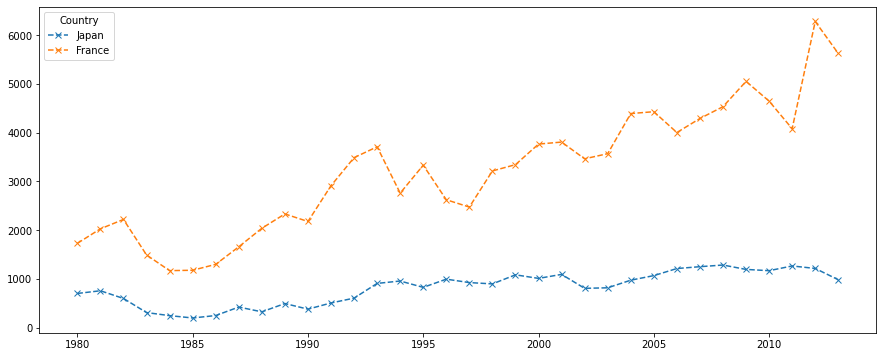

In [ ]:
canada.loc[['Japan','France'],years].T.plot(kind='line',figsize = (15,6), style='x--')

In [ ]:
df.loc[rowrange, columnrange]
df.loc[:, rangeofyears ].sum(axis=1)

NameError: name 'df' is not defined

In [ ]:
canada['1980-1989']=canada.loc[:,map(str,range(1980,1990))].sum(axis=1)
canada['1990-1999']=canada.loc[:,map(str,range(1990,2000))].sum(axis=1)
canada['2000-2009']=canada.loc[:,map(str,range(2000,2010))].sum(axis=1)
canada.head()

,Continent,Region,Status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,total,mean,faltu,1980-1989,1990-1999,2000-2009
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639,1724.676471,0,3693,15845,30501
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699,461.735294,0,9,2568,10799
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439,2042.323529,0,1271,13153,37833
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6,0.176471,0,3,2,1
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15,0.441176,0,2,6,5


In [ ]:
# fix the country name
print(canada.index.tolist()) # country name in the list

['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'China, Hong Kong Special Administrative Region', 'China, Macao Special Administrative Region', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', "Democratic People's Republic of Korea", 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Ger

In [ ]:
# to replacing the value in the list
lst=[1,2,3,4,5]
type(lst)
lst[4]="ayush"
print(lst[4])
lst[4]

ayush


'ayush'

In [ ]:
canada.loc['Algeria',years] #series..years are y axis and numbers are x axis

1980      80
1981      67
1982      71
1983      69
1984      63
1985      44
1986      69
1987     132
1988     242
1989     434
1990     491
1991     872
1992     795
1993     717
1994     595
1995    1106
1996    2054
1997    1842
1998    2292
1999    2389
2000    2867
2001    3418
2002    3406
2003    3072
2004    3616
2005    3626
2006    4807
2007    3623
2008    4005
2009    5393
2010    4752
2011    4325
2012    3774
2013    4331
Name: Algeria, dtype: object

In [ ]:
 canada.loc[['Algeria','Albania'],years]#data frame T = transpose or clear the value

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Algeria,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
Albania,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603


In [ ]:
canada.loc[['Algeria','Albania'],years].T#data frame T = transpose or clear the value

Country,Algeria,Albania
1980,80,1
1981,67,0
1982,71,0
1983,69,0
1984,63,0
1985,44,0
1986,69,1
1987,132,2
1988,242,2
1989,434,3


# pie chart use for percentage value
# bar chart use for comparison

<AxesSubplot:>

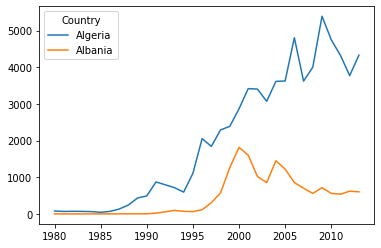

In [ ]:
canada.loc[['Algeria','Albania'],years].T.plot()
# plot() used to draw a graph

In [ ]:
decade_cols = ['1980-1989','1990-1999','2000-2009']
plt.figure(facecolor='white') # always write down face colour/back ground colour first
canada.loc['Japan',decade_cols].plot(kind='pie',figsize=(10,6), autopct='%1.1f%%')
# name of file.loc['name headung which you want value',enter year/date whatever you ant to show]
# kind ='chart name.. ex pie, bar, donat', figsize =(height,width)

NameError: name 'plt' is not defined

<AxesSubplot:>

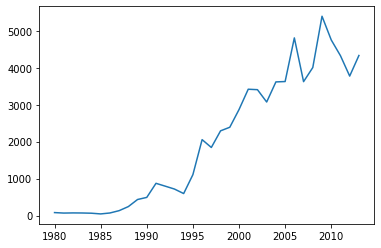

In [ ]:
canada.loc['Algeria',years].T.plot()

In [ ]:
len(country_list) # count of country in this excel sheet

195

In [ ]:
canada.loc[country_list[:10],decade_cols].T.plot(
    kind='bar',
    figsize=(50,10),
    subplots=True,
    layout=(2,5),
    )
plt.savefig('first_five_countries.png',bbox_inches='tight')

<AxesSubplot:>

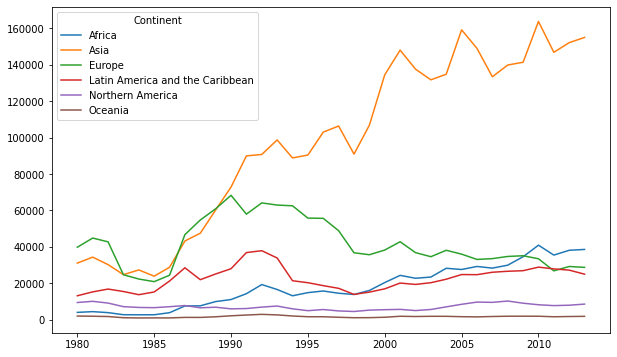

In [ ]:
canada.groupby('Continent').sum()[years].T.plot(kind='line',figsize=(10,6))

<AxesSubplot:>

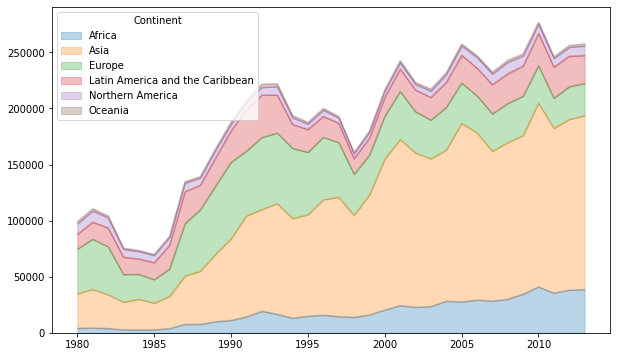

In [ ]:
canada.groupby('Continent').sum()[years].T.plot(
        kind='area',
        figsize=(10,6),
        alpha=0.3)
        # groupby('enter the label which value you want').sum/average/mean/max[which years]

<AxesSubplot:>

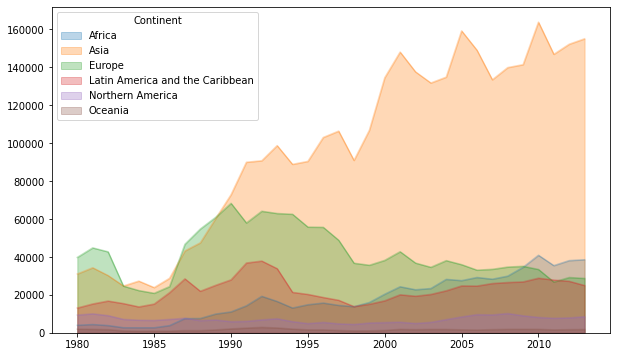

In [ ]:
canada.groupby('Continent').sum()[years].T.plot(
        kind='area',
        figsize=(10,6),
        stacked=False, # use to show clear picture
        alpha=0.3)

In [ ]:
country_list = canada.index.tolist()# to get country name , make index

In [ ]:
can2010 = canada.sort_values(by='2010',ascending=False)
px.bar(can2010, x=can2010.index, y='2010', color='Continent',height=700)
# px.bar use to value moving graph
# (can2010, mention here year
# x=can2010.index, define x axis value
#  y='2010', define y axis value
# color='Continent',height=700)

In [ ]:
can2013 = canada.sort_values(by='2013',ascending=False)
px.area(can2013, x=can2010.index, y='2013', color='Continent',height=700)

In [ ]:
px.choropleth(canada,
            locations=canada.index,
            locationmode='country names',
            color='2013',
            color_continuous_scale='Viridis',
            range_color=(0,canada['2013'].max()),
            title='Canada by 2013',
            template='plotly_dark',

SyntaxError: unexpected EOF while parsing (1927193276.py, line 8)

In [ ]:
canada.loc[country_list[:10],decades_cols]
T.plot(kind='pie'),
figsize=(15,6),
autopct='%1.1f%%',
subplots= true,)

# subplot to make one graph

SyntaxError: unmatched ')' (2466193113.py, line 5)

In [ ]:
canada.groupby('continent').sum()[years].T.plot(kind='area', figsize=(10,6),stacked=False, alpha=0.3)

In [ ]:
from plotly.io import renderers
renderers.default = 'notebook' 

In [ ]:
px.scatter(canada, x=canada.index, y='2010', color='Continent', height=700)